In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [10]:
from load_librairies import *
from scipy.stats.stats import pearsonr
import matplotlib.ticker as mticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy
%matplotlib inline 
def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended
import scipy

def is_jja(month):
    return (month>=6) & (month<=8)

def is_amj(month):
    return (month>=4) & (month<=6)
dir_proj = '/home/netapp-clima-users/users/aprigent/Projects/TAV_OMIP/'
path_fig = dir_proj+'/figures_final/'


dir_tos_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/tos/mon/'
dir_tos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/tos/mon/'


dir_zos_omip1 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip1/zos/mon/'
dir_zos_omip2 = '/home/netapp-clima-users/users/aprigent/CMIP6/ocean/omip2/zos/mon/'

dir_oras5 = '/home/netapp-clima-users/users/aprigent/Observations/ORA-S5/'



#dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/HadI-SST/'
dir_obs_sst = '/home/netapp-clima-users/users/aprigent/Observations/'


path_data_out = '/media/aprigent/Arthur_disk/data_uncertainty/'

dir_ccmp = '/media/aprigent/Arthur_disk/TAV_OMIP/'

period_str = 1985
period_end = 2004


dir_jra55 = '/media/aprigent/Arthur_disk/Data/MOM_JRA55do/'

dir_core2 = '/media/aprigent/Arthur_disk/Data/CORE2/'

/tmp/ipykernel_3905/3440139993.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


# Load JRA55
- TAV_OMIP/bash/extract_uas_JRA55do.sh
- TAV_OMIP/bash/extract_uas_JRA55do_atl.sh


### UAS

In [3]:

#uas_jra55_mon = xr.open_dataset('/media/aprigent/Arthur_disk/Data/MOM_JRA55do/JRA_uas.1958_2022_atl4_monmean.nc')
#uas_jra55_eq_mon = xr.open_dataset('/media/aprigent/Arthur_disk/Data/MOM_JRA55do/JRA_uas.1958_2022_eq_monmean.nc')
#uas_jra55_atl_mon = xr.open_dataset('/media/aprigent/Arthur_disk/Data/MOM_JRA55do/JRA_uas.1958_2022_atl_monmean_r360x180.nc',
#                            use_cftime=True)
#uas_jra55_eq_mon = uas_jra55_eq_mon.sel(time=slice(datetime(period_str, 1, 1),
#                                                               datetime(period_end, 12, 31)))

In [4]:
uwind_JRA55_tmp = xr.open_dataset(dir_jra55+'JRA_uas.1958_2022_atl_monmean_r360x180.nc') 
uwind_JRA55_tmp = xr.concat([uwind_JRA55_tmp.uas[:,:,180:],uwind_JRA55_tmp.uas[:,:,:180]],dim = 'lon') 
uwind_JRA55_tmp.coords['lon'] = (uwind_JRA55_tmp.coords['lon'] + 180)%360 - 180

uwind_jra55_eq_mon = Atools.data_sub(uwind_JRA55_tmp,-40,10,-3,3)

uas_jra55_eq_mon = uwind_jra55_eq_mon.sel(time=slice(datetime(period_str, 1, 1),
                                                               datetime(period_end, 12, 31)))

In [5]:
uas_jra55_eq_arr = np.array(uas_jra55_eq_mon)
uas_jra55_eq_dtd = np.ones((uas_jra55_eq_mon.shape))*np.nan
for i in range(uas_jra55_eq_dtd.shape[1]):
    for j in range(uas_jra55_eq_dtd.shape[2]):
        uas_jra55_eq_dtd[:,i,j] = nandetrend(uas_jra55_eq_arr[:,i,j])

        
uas_jra55_eq_dataset = xr.Dataset({'uas_dtd': (['time','lat','lon'], uas_jra55_eq_dtd), 
    }, 
    coords={'time': np.array(uas_jra55_eq_mon.time), 
    'lat': np.array(uas_jra55_eq_mon.lat), 
    'lon': np.array(uas_jra55_eq_mon.lon)} ) 



uas_jra55_eq_dataset_monthly = uas_jra55_eq_dataset.sel(time=slice(datetime(period_str, 1, 1),
                                                               datetime(period_end, 12, 31)))

In [6]:
uas_jra55_eq_dataset_monthly_mean = uas_jra55_eq_dataset_monthly.uas_dtd.mean(dim='lat').groupby('time.month').mean()



### ZOS
- TAV_OMIP/scripts/processing/prepare_zos_omip2.ipynb

In [7]:
zos_eq_omip2_tmp = xr.open_dataset(path_data_out+'zos_omip2_atl_1985_2004.nc')
zos_eq_omip2 = Atools.data_sub(zos_eq_omip2_tmp,-40,10,-3,3)


In [8]:
sla_eq_omip2 = zos_eq_omip2.zos_atl - zos_eq_omip2.zos_atl.mean(dim='time')

sla_eq_omip2_mean = sla_eq_omip2.mean(dim='lat')
sla_eq_omip2_mean_monthly = sla_eq_omip2_mean.groupby('time.month').mean()

In [9]:
sla_eq_omip2_mean_monthly_40w_30w = sla_eq_omip2_mean_monthly.where(
    (sla_eq_omip2_mean_monthly.lon>-40)&(sla_eq_omip2_mean_monthly.lon<-30)).mean(dim='lon')


sla_eq_omip2_mean_monthly_40w_30w_mam = sla_eq_omip2_mean_monthly_40w_30w[:,2:5].mean(dim='month')
sla_eq_omip2_mean_monthly_40w_30w_son = sla_eq_omip2_mean_monthly_40w_30w[:,8:11].mean(dim='month')

amp_sla_omip2 = sla_eq_omip2_mean_monthly_40w_30w_son - sla_eq_omip2_mean_monthly_40w_30w_mam

print('Amplitude of the OMIP2 SLA = ',
      amp_sla_omip2.mean(dim='model').values,'+/-',
      amp_sla_omip2.std(dim='model').values,'m')

Amplitude of the OMIP2 SLA =  0.05293313114788843 +/- 0.009843426895674948 m


# TOS
- TAV_OMIP/scripts/figure_01_map_std_ssta.ipynb

In [11]:
sst_omip2_atl_tmp = xr.open_dataset(path_data_out+'sst_ssta_omip2_atl_1985_2004.nc')
sst_omip2_eq = Atools.data_sub(sst_omip2_atl_tmp,-40,10,-3,3)
sst_omip2_eq_mean = sst_omip2_eq.sst.mean(dim='lat')


In [12]:
sst_omip2_eq_mean_monthly_mean = sst_omip2_eq_mean.groupby('time.month').mean()

In [13]:
sst_omip2_eq_mean_monthly_mean_20w_0w = sst_omip2_eq_mean_monthly_mean.where(
    (sst_omip2_eq_mean_monthly_mean.lon>-20)&(sst_omip2_eq_mean_monthly_mean.lon<0)).mean(dim='lon')

sst_omip2_eq_mean_monthly_mean_20w_0w_jas = sst_omip2_eq_mean_monthly_mean_20w_0w[:,6:9].mean(dim='month')
print('SST in JAS OMIP2 = ',sst_omip2_eq_mean_monthly_mean_20w_0w_jas.mean(dim='model').values,'+/-',
      sst_omip2_eq_mean_monthly_mean_20w_0w_jas.std(dim='model').values,'degC')

sst_omip2_eq_mean_monthly_mean_20w_0w_mam = sst_omip2_eq_mean_monthly_mean_20w_0w[:,2:5].mean(dim='month')
print('SST in MAM OMIP2 = ',sst_omip2_eq_mean_monthly_mean_20w_0w_mam.mean(dim='model').values,'+/-',
      sst_omip2_eq_mean_monthly_mean_20w_0w_mam.std(dim='model').values,'degC')

amp_omip2_sst = sst_omip2_eq_mean_monthly_mean_20w_0w_mam - sst_omip2_eq_mean_monthly_mean_20w_0w_jas

print('AMP SST omip2 = ',amp_omip2_sst.mean(dim='model').values,
      '+/-',
      amp_omip2_sst.std(dim='model').values,'degC')

SST in JAS OMIP2 =  25.367392643171492 +/- 0.1651695789385395 degC
SST in MAM OMIP2 =  28.652428499115977 +/- 0.04721044269297801 degC
AMP SST omip2 =  3.2850358559444777 +/- 0.15774957088816474 degC


# Load CORE-II
- TAV_OMIP/bash/extract_uas_CORE2.sh
- TAV_OMIP/bash/extract_uas_CORE2_atl.sh 

### UAS

In [14]:

#uas_core2_eq_mon = xr.open_dataset('/media/aprigent/Arthur_disk/Data/CORE2/u_10_mod.1948-2007.paddednomads_eq_monmean.nc',
#                            use_cftime=True)
#uas_core2_eq_mon['TIME'] = uas_core2_eq_mon.indexes['TIME'].to_datetimeindex()
#
#uas_core2_eq_mon = uas_core2_eq_mon.sel(TIME=slice(datetime(period_str, 1, 1),
#                                                               datetime(period_end, 12, 31)))



uwind_CORE2_tmp = xr.open_dataset(dir_core2+'u_10_mod.1948-2007.paddednomads_atl_monmean_r360x180.nc',
                                  use_cftime=True) 

uwind_CORE2_tmp['TIME'] = uwind_CORE2_tmp.indexes['TIME'].to_datetimeindex()

uwind_CORE2_tmp = xr.concat([uwind_CORE2_tmp.U_10_MOD[:,:,180:],
                             uwind_CORE2_tmp.U_10_MOD[:,:,:180]],dim = 'lon') 
uwind_CORE2_tmp.coords['lon'] = (uwind_CORE2_tmp.coords['lon'] + 180)%360 - 180

uwind_CORE2_tmp = Atools.data_sub(uwind_CORE2_tmp,-41,10,-3,3)


uas_core2_eq_mon = uwind_CORE2_tmp.sel(TIME=slice(datetime(period_str, 1, 1),
                                                               datetime(period_end, 12, 31)))



/tmp/ipykernel_3905/3433392890.py:13: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  uwind_CORE2_tmp['TIME'] = uwind_CORE2_tmp.indexes['TIME'].to_datetimeindex()


In [15]:
uas_core2_eq_arr = np.array(uas_core2_eq_mon)
uas_core2_eq_dtd = np.ones((uas_core2_eq_mon.shape))*np.nan
for i in range(uas_core2_eq_dtd.shape[1]):
    for j in range(uas_core2_eq_dtd.shape[2]):
        uas_core2_eq_dtd[:,i,j] = nandetrend(uas_core2_eq_arr[:,i,j])

        
uas_core2_eq_dataset = xr.Dataset({'uas_dtd': (['time','lat','lon'], uas_core2_eq_dtd), 
    }, 
    coords={'time': np.array(uas_core2_eq_mon.TIME), 
    'lat': np.array(uas_core2_eq_mon.lat), 
    'lon': np.array(uas_core2_eq_mon.lon)} ) 



uas_core2_eq_dataset_monthly = uas_core2_eq_dataset.sel(time=slice(datetime(period_str, 1, 1),
                                                               datetime(period_end, 12, 31)))

In [16]:
uas_core2_eq_dataset_monthly_mean = uas_core2_eq_dataset_monthly.uas_dtd.mean(dim='lat').groupby('time.month').mean()



### ZOS
- TAV_OMIP/scripts/processing/prepare_zos_omip1.ipynb


In [17]:
zos_eq_omip1_tmp = xr.open_dataset(path_data_out+'zos_omip1_atl_1985_2004_cycle5.nc')
zos_eq_omip1 = Atools.data_sub(zos_eq_omip1_tmp,-40,10,-3,3)



In [18]:
sla_eq_omip1 = zos_eq_omip1.zos_atl - zos_eq_omip1.zos_atl.mean(dim='time')

sla_eq_omip1_mean = sla_eq_omip1.mean(dim='lat')
sla_eq_omip1_mean_monthly = sla_eq_omip1_mean.groupby('time.month').mean()

In [19]:
sla_eq_omip1_mean_monthly_40w_30w = sla_eq_omip1_mean_monthly.where(
    (sla_eq_omip1_mean_monthly.lon>-40)&(sla_eq_omip1_mean_monthly.lon<-30)).mean(dim='lon')

In [20]:
sla_eq_omip1_mean_monthly_40w_30w_mam = sla_eq_omip1_mean_monthly_40w_30w[:,2:5].mean(dim='month')
sla_eq_omip1_mean_monthly_40w_30w_son = sla_eq_omip1_mean_monthly_40w_30w[:,8:11].mean(dim='month')

In [21]:
amp_sla_omip1 = sla_eq_omip1_mean_monthly_40w_30w_son - sla_eq_omip1_mean_monthly_40w_30w_mam

In [22]:
print('Amplitude of the OMIP1 SLA = ',
      amp_sla_omip1.mean(dim='model').values,'+/-',
      amp_sla_omip1.std(dim='model').values,'m')

Amplitude of the OMIP1 SLA =  0.07216694586943108 +/- 0.006871579090271517 m


### TOS 
- TAV_OMIP/scripts/figure_01_map_std_ssta.ipynb

In [23]:
sst_omip1_atl_tmp = xr.open_dataset(path_data_out+'sst_ssta_omip1_atl_1985_2004_cycle5.nc')
sst_omip1_eq = Atools.data_sub(sst_omip1_atl_tmp,-40,10,-3,3)
sst_omip1_eq_mean = sst_omip1_eq.sst.mean(dim='lat')


sst_omip1_eq_mean_monthly_mean = sst_omip1_eq_mean.groupby('time.month').mean()

In [24]:
sst_omip1_eq_mean_monthly_mean_20w_0w = sst_omip1_eq_mean_monthly_mean.where(
    (sst_omip1_eq_mean_monthly_mean.lon>-20)&(sst_omip1_eq_mean_monthly_mean.lon<0)).mean(dim='lon')

sst_omip1_eq_mean_monthly_mean_20w_0w_jas = sst_omip1_eq_mean_monthly_mean_20w_0w[:,6:9].mean(dim='month')
print('SST in JAS OMIP1 = ',sst_omip1_eq_mean_monthly_mean_20w_0w_jas.mean(dim='model').values,'+/-',
      sst_omip1_eq_mean_monthly_mean_20w_0w_jas.std(dim='model').values,'degC')

sst_omip1_eq_mean_monthly_mean_20w_0w_mam = sst_omip1_eq_mean_monthly_mean_20w_0w[:,2:5].mean(dim='month')
print('SST in MAM OMIP1 = ',sst_omip1_eq_mean_monthly_mean_20w_0w_mam.mean(dim='model').values,'+/-',
      sst_omip1_eq_mean_monthly_mean_20w_0w_mam.std(dim='model').values,'degC')

amp_omip1_sst = np.round(sst_omip1_eq_mean_monthly_mean_20w_0w_mam,2) - np.round(sst_omip1_eq_mean_monthly_mean_20w_0w_jas,2)

print('AMP SST omip1 = ',amp_omip1_sst.mean(dim='model').values,
      '+/-',
      amp_omip1_sst.std(dim='model').values,'degC')

SST in JAS OMIP1 =  25.349957525724278 +/- 0.08463740564032878 degC
SST in MAM OMIP1 =  28.5275493908148 +/- 0.04793185673981146 degC
AMP SST omip1 =  3.1799999999999997 +/- 0.09746794344809012 degC


In [25]:
np.round(sst_omip1_eq_mean_monthly_mean_20w_0w_mam,2).mean()

<xarray.DataArray 'sst' ()>
array(28.52833333)

# ORA-S5

## zos

In [26]:


zos_oras5 = xr.open_mfdataset(dir_oras5+'sossheig_merged_r360x180_oras5_1984_2005.nc',use_cftime=True)
zos_oras5_eq = Atools.data_sub(zos_oras5.sossheig,-40,10,-3,3)

zos_oras5_eq_dtd = np.ones((zos_oras5_eq.shape))*np.nan

for i in range(zos_oras5_eq.shape[1]):
    for j in range(zos_oras5_eq.shape[2]):
        zos_oras5_eq_dtd[:,i,j] = nandetrend(zos_oras5_eq[:,i,j])

        
zos_oras5_eq_dtd_xarray  = xr.Dataset({'zos_dtd': (['time','lat','lon'],zos_oras5_eq_dtd)}
                       ,coords={'time':np.array(zos_oras5_eq.time_counter),
                                'lon':np.array(zos_oras5_eq.lon),
                                'lat':np.array(zos_oras5_eq.lat)
                                })
        


In [27]:
sla_oras5_eq_dtd_xarray = zos_oras5_eq_dtd_xarray.zos_dtd - zos_oras5_eq_dtd_xarray.zos_dtd.mean(dim='time')

In [28]:
sla_oras5_eq_dtd_xarray_mean = sla_oras5_eq_dtd_xarray.mean(dim='lat')

SLA_oras5_eq_dtd_mean_monthly = sla_oras5_eq_dtd_xarray_mean.groupby('time.month').mean()

In [29]:
SLA_oras5_eq_dtd_mean_monthly_40w_30w = SLA_oras5_eq_dtd_mean_monthly.where(
    (SLA_oras5_eq_dtd_mean_monthly.lon>-40)&(SLA_oras5_eq_dtd_mean_monthly.lon<-30)).mean(dim='lon')

In [30]:
SLA_oras5_eq_dtd_mean_monthly_40w_30w_mam = SLA_oras5_eq_dtd_mean_monthly_40w_30w[2:5].mean()

SLA_oras5_eq_dtd_mean_monthly_40w_30w_son = SLA_oras5_eq_dtd_mean_monthly_40w_30w[8:11].mean()

In [32]:
amp_sla_ORAS5 = SLA_oras5_eq_dtd_mean_monthly_40w_30w_son - SLA_oras5_eq_dtd_mean_monthly_40w_30w_mam

print('ORA-S5 amplitude SSH = ',amp_sla_ORAS5.values)

ORA-S5 amplitude SSH =  0.09632630822309282


# TOS

In [33]:
## sst ##

sst_oras5_tmp = xr.open_dataset(dir_obs_sst+'ORA-S5/sosstsst_merged_r360x180_oras5_1984_2005.nc')
sst_oras5_tmp = Atools.data_sub(sst_oras5_tmp.sosstsst,-40,10,-3,3)

sst_oras5 = sst_oras5_tmp.sel(time_counter=slice(datetime(period_str, 1, 1), datetime(period_end, 12, 31)))
sst_oras5_arr = np.array(sst_oras5)
sst_oras5_atl_dtd = np.ones((sst_oras5_arr.shape))*np.nan
for i in range(sst_oras5_atl_dtd.shape[1]):
    for j in range(sst_oras5_atl_dtd.shape[2]):
        sst_oras5_atl_dtd[:,i,j] = nandetrend(sst_oras5_arr[:,i,j])
        
        
sst_oras5_atl_dtd_xarray  = xr.Dataset({'sst_dtd': (['time','lat','lon'],sst_oras5_atl_dtd)}
                       ,coords={'time':np.array(sst_oras5.time_counter),
                                'lon':np.array(sst_oras5.lon),
                                'lat':np.array(sst_oras5.lat)
                                })

In [34]:

sst_oras5_atl_dtd_mean = sst_oras5_atl_dtd_xarray.sst_dtd.mean(dim='lat')
sst_oras5_atl_dtd_mean_monthly = sst_oras5_atl_dtd_mean.groupby('time.month').mean()

In [35]:
sst_oras5_atl_dtd_mean_monthly_20w_0w = sst_oras5_atl_dtd_mean_monthly.where(
    (sst_oras5_atl_dtd_mean_monthly.lon>-20)&(sst_oras5_atl_dtd_mean_monthly.lon<0)).mean(dim='lon')

In [36]:
sst_oras5_atl_dtd_mean_monthly_20w_0w_jas = sst_oras5_atl_dtd_mean_monthly_20w_0w[6:9].mean(dim='month')
print('SST in JAS ORA-S5 = ',sst_oras5_atl_dtd_mean_monthly_20w_0w_jas.values,'degC')

sst_oras5_atl_dtd_mean_monthly_20w_0w_mam = sst_oras5_atl_dtd_mean_monthly_20w_0w[2:5].mean(dim='month')
print('SST in MAM ORA-S5 = ',sst_oras5_atl_dtd_mean_monthly_20w_0w_mam.values,'degC')



amp_oras5_sst = np.round(sst_oras5_atl_dtd_mean_monthly_20w_0w_mam,2) - np.round(sst_oras5_atl_dtd_mean_monthly_20w_0w_jas,2)

print('AMP SST oras5 = ',amp_oras5_sst.values,'degC')

SST in JAS ORA-S5 =  24.790263174028723 degC
SST in MAM ORA-S5 =  28.521017021761732 degC
AMP SST oras5 =  3.7300000000000004 degC


## CCMP

In [39]:
uwind_ccmp = xr.open_dataset(dir_ccmp+'ccmp_uwind_r360x180.nc')



uwind_ccmp = xr.concat([uwind_ccmp.uwnd[:,:,180:],uwind_ccmp.uwnd[:,:,:180]],dim = 'lon') 
uwind_ccmp.coords['lon'] = (uwind_ccmp.coords['lon'] + 180)%360 - 180

uwind_ccmp_tmp = Atools.data_sub(uwind_ccmp,-40,10,-3,3)
uwind_ccmp = uwind_ccmp_tmp.sel(time=slice(datetime(period_str, 1, 1), datetime(period_end, 12, 31)))
uwind_ccmp_arr = np.array(uwind_ccmp)
uwind_ccmp_atl_dtd = np.ones((uwind_ccmp_arr.shape))*np.nan
for i in range(uwind_ccmp_atl_dtd.shape[1]):
    for j in range(uwind_ccmp_atl_dtd.shape[2]):
        uwind_ccmp_atl_dtd[:,i,j] = nandetrend(uwind_ccmp_arr[:,i,j])
        
        
uwind_ccmp_atl_dtd_xarray  = xr.Dataset({'uas_dtd': (['time','lat','lon'],uwind_ccmp_atl_dtd)}
                       ,coords={'time':np.array(uwind_ccmp.time),
                                'lon':np.array(uwind_ccmp.lon),
                                'lat':np.array(uwind_ccmp.lat)
                                })

In [40]:
uwind_ccmp_eq_dtd = Atools.data_sub(uwind_ccmp_atl_dtd_xarray,-40,10,-3,3).weighted(
        np.cos(np.deg2rad(Atools.data_sub(uwind_ccmp_atl_dtd_xarray,-40,10,-3,3).lat))).mean(('lat'))



In [41]:

uwind_ccmp_eq_dtd_mean_monthly = uwind_ccmp_eq_dtd.groupby('time.month').mean()

# Figure 3

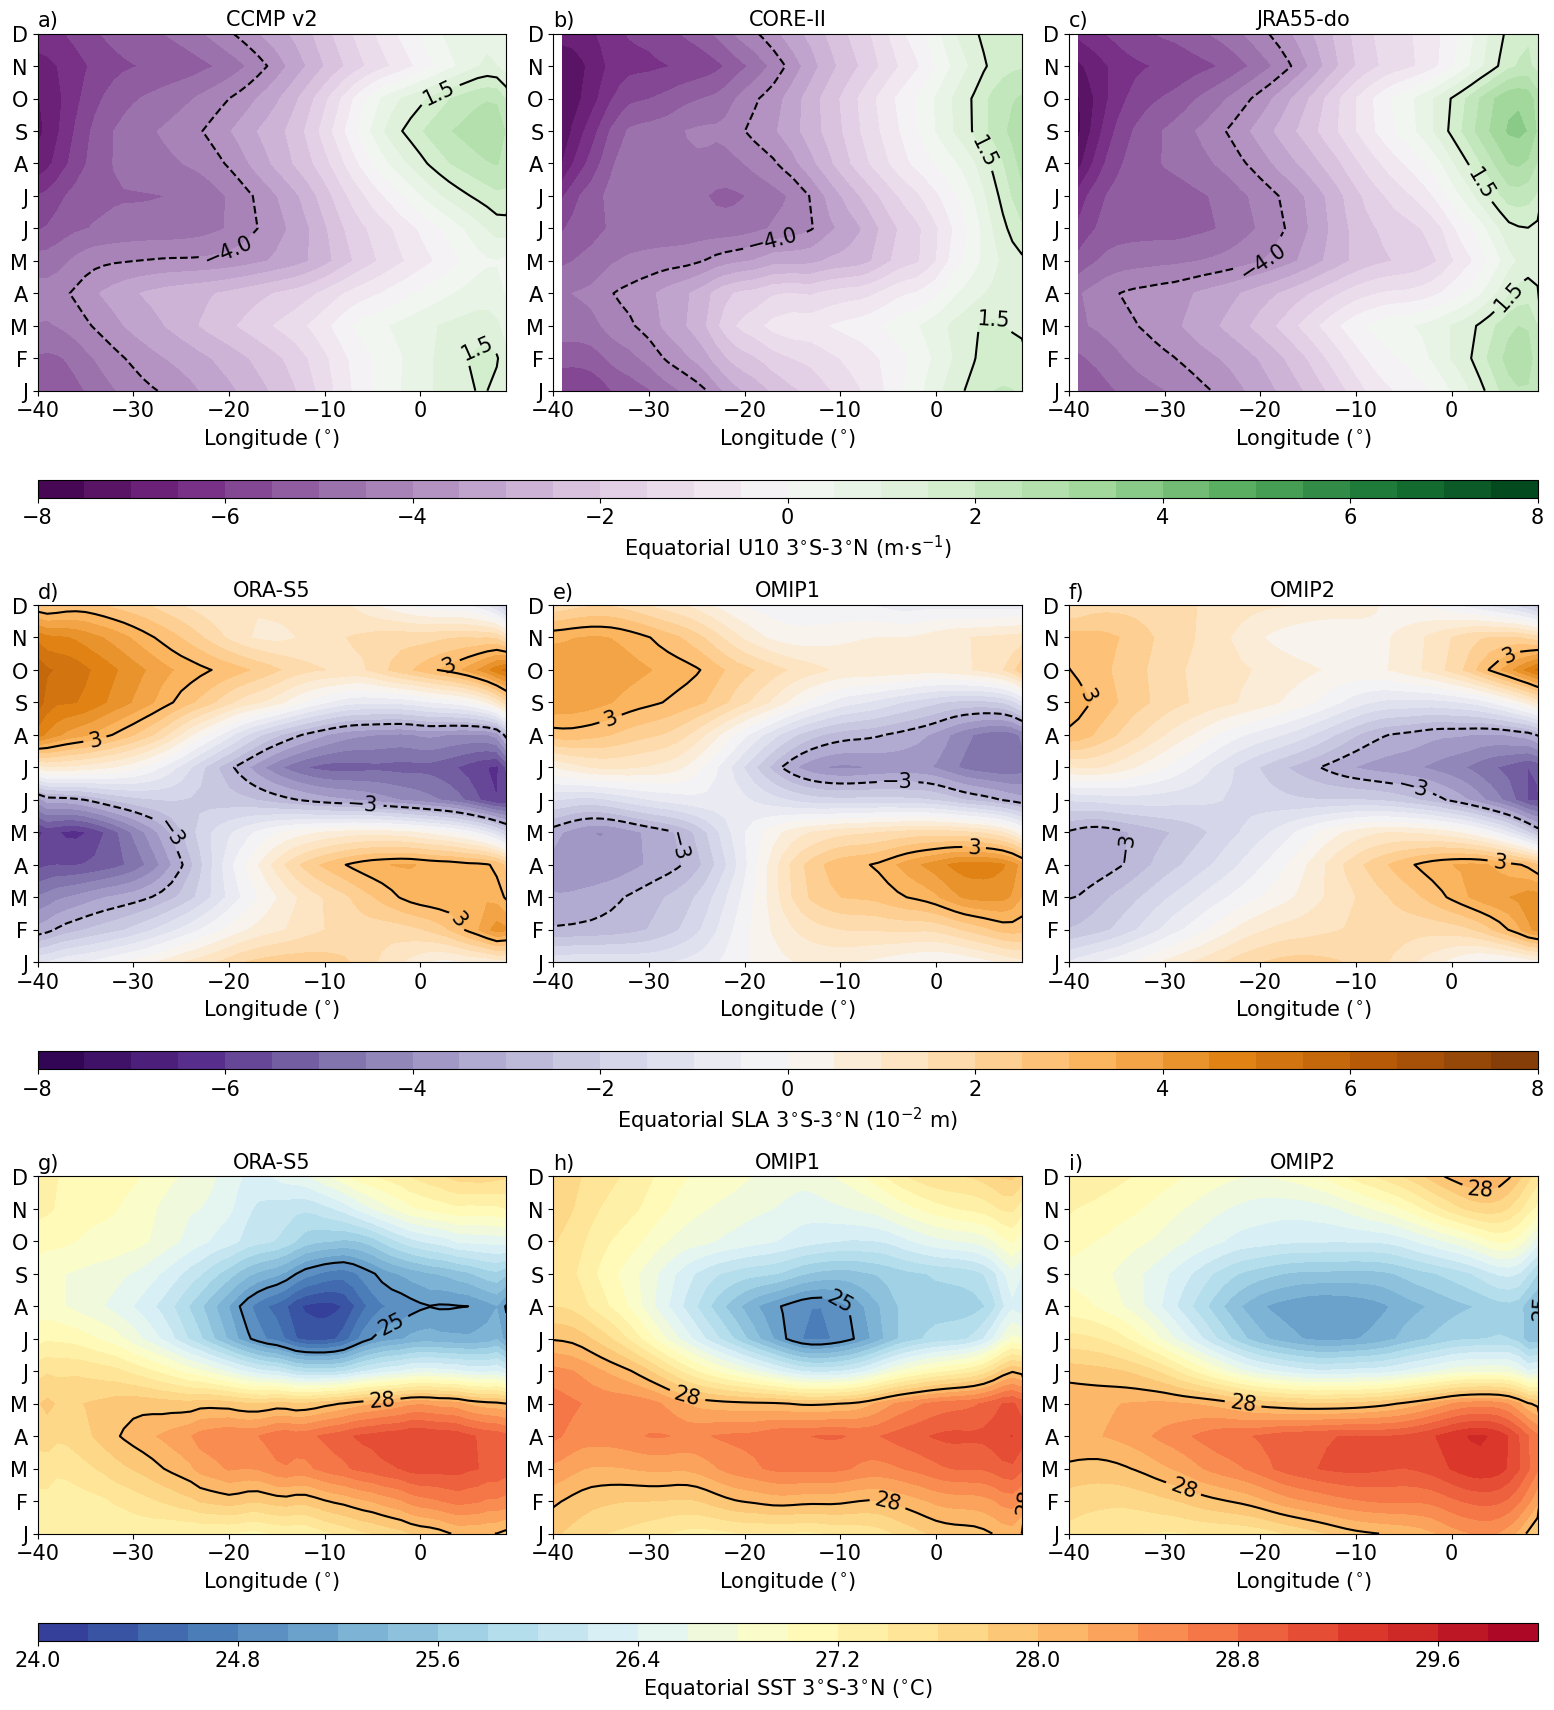

In [42]:
f,ax = plt.subplots(3,3,figsize=[15,15])
f.patch.set_facecolor('white')
cmap = plt.cm.PRGn
levels= np.arange(-8,8.5,0.5)


cmap1 = plt.cm.PuOr_r
levels1= np.arange(-8,8.5,0.5)


cmap2 = plt.cm.RdYlBu_r
levels2= np.arange(24,30.2,0.2)



ftz=15
ax=ax.ravel()
month = ['J','F','M','A','M','J','J','A','S','O','N','D']
plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.6, wspace=0.1)

cax0 = inset_axes(ax[0],
                 width='320%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[0].transAxes,
                 borderpad=0)

cax2 = inset_axes(ax[3],
                 width='320%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[3].transAxes,
                 borderpad=0)


cax4 = inset_axes(ax[6],
                 width='320%',
                 height='5%',
                 loc = 'lower left',
                 bbox_to_anchor=(0,-0.3,1,1),
                 bbox_transform=ax[6].transAxes,
                 borderpad=0)






p0 = ax[0].contourf(uwind_ccmp_eq_dtd_mean_monthly.lon,
               uwind_ccmp_eq_dtd_mean_monthly.month,
               uwind_ccmp_eq_dtd_mean_monthly.uas_dtd,
               cmap=cmap,
               levels=levels)
cs0 = ax[0].contour(uwind_ccmp_eq_dtd_mean_monthly.lon,
               uwind_ccmp_eq_dtd_mean_monthly.month,
               uwind_ccmp_eq_dtd_mean_monthly.uas_dtd,colors='black',
               levels=[-4,1.5])
ax[0].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[0].tick_params(labelsize=ftz)
ax[0].set_yticks(uwind_ccmp_eq_dtd_mean_monthly.month.values)
ax[0].set_yticklabels(month,fontsize = ftz)
ax[0].set_title('CCMP v2',fontsize=ftz)
ax[0].set_xlim([-40,9])
ax[0].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)



p0 = ax[1].contourf(uas_core2_eq_dataset_monthly_mean.lon,
               uas_core2_eq_dataset_monthly_mean.month,
               uas_core2_eq_dataset_monthly_mean,
               cmap=cmap,
               levels=levels)

cs0 = ax[1].contour(uas_core2_eq_dataset_monthly_mean.lon,
               uas_core2_eq_dataset_monthly_mean.month,
               uas_core2_eq_dataset_monthly_mean,colors='black',
               levels=[-4,1.5])
ax[1].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)
ax[1].tick_params(labelsize=ftz)
ax[1].set_yticks(uas_core2_eq_dataset_monthly_mean.month.values)
ax[1].set_yticklabels(month,fontsize = ftz)
ax[1].set_title('CORE-II',fontsize=ftz)
ax[1].set_xlim([-40,9])
ax[1].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)

cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Equatorial U10 3$^{\circ}$S-3$^{\circ}$N (m$\cdot$s$^{-1}$)',fontsize=ftz)

ax[2].contourf(uas_jra55_eq_dataset_monthly_mean.lon,
               uas_jra55_eq_dataset_monthly_mean.month,
               uas_jra55_eq_dataset_monthly_mean,
               cmap=cmap,
               levels=levels)

cs0 = ax[2].contour(uas_jra55_eq_dataset_monthly_mean.lon,
               uas_jra55_eq_dataset_monthly_mean.month,
               uas_jra55_eq_dataset_monthly_mean,colors='black',
               levels=[-4,1.5])
ax[2].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)
ax[2].tick_params(labelsize=ftz)
ax[2].set_yticks(uas_jra55_eq_dataset_monthly_mean.month.values)
ax[2].set_yticklabels(month,fontsize = ftz)
ax[2].set_title('JRA55-do',fontsize=ftz)
ax[2].set_xlim([-40,9])
ax[2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)





p2 = ax[3].contourf(SLA_oras5_eq_dtd_mean_monthly.lon,
               SLA_oras5_eq_dtd_mean_monthly.month,
               SLA_oras5_eq_dtd_mean_monthly*100,
               cmap=cmap1,
               levels=levels1)

cs0 = ax[3].contour(SLA_oras5_eq_dtd_mean_monthly.lon,
               SLA_oras5_eq_dtd_mean_monthly.month,
               SLA_oras5_eq_dtd_mean_monthly*100,colors='black',
               levels=[-3,3])
ax[3].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[3].tick_params(labelsize=ftz)
ax[3].set_yticks(SLA_oras5_eq_dtd_mean_monthly.month.values)
ax[3].set_yticklabels(month,fontsize = ftz)
ax[3].set_title('ORA-S5',fontsize=ftz)
ax[3].set_xlim([-40,9])
ax[3].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)

cbar = plt.colorbar(p2,cax2,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Equatorial SLA 3$^{\circ}$S-3$^{\circ}$N (10$^{-2}$ m)',fontsize=ftz)



p2 = ax[4].contourf(sla_eq_omip1_mean_monthly.lon,
               sla_eq_omip1_mean_monthly.month,
               sla_eq_omip1_mean_monthly.mean(dim='model')*100,
               cmap=cmap1,
               levels=levels1)

cs0 = ax[4].contour(sla_eq_omip1_mean_monthly.lon,
               sla_eq_omip1_mean_monthly.month,
               sla_eq_omip1_mean_monthly.mean(dim='model')*100,colors='black',
               levels=[-3,3])
ax[4].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)
ax[4].tick_params(labelsize=ftz)
ax[4].set_yticks(sla_eq_omip1_mean_monthly.month.values)
ax[4].set_yticklabels(month,fontsize = ftz)
ax[4].set_title('OMIP1',fontsize=ftz)
ax[4].set_xlim([-40,9])
ax[4].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)



ax[5].contourf(sla_eq_omip2_mean_monthly.lon,
               sla_eq_omip2_mean_monthly.month,
               sla_eq_omip2_mean_monthly.mean(dim='model')*100,
               cmap=cmap1,
               levels=levels1)

cs0 = ax[5].contour(sla_eq_omip2_mean_monthly.lon,
               sla_eq_omip2_mean_monthly.month,
               sla_eq_omip2_mean_monthly.mean(dim='model')*100,colors='black',
               levels=[-3,3])
ax[5].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)
ax[5].tick_params(labelsize=ftz)
ax[5].set_yticks(sla_eq_omip2_mean_monthly.month.values)
ax[5].set_yticklabels(month,fontsize = ftz)
ax[5].set_title('OMIP2',fontsize=ftz)
ax[5].set_xlim([-40,9])
ax[5].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)




p4 = ax[6].contourf(sst_oras5_atl_dtd_mean_monthly.lon,
               sst_oras5_atl_dtd_mean_monthly.month,
               sst_oras5_atl_dtd_mean_monthly,
               cmap=cmap2,
               levels=levels2)

cs0 = ax[6].contour(sst_oras5_atl_dtd_mean_monthly.lon,
               sst_oras5_atl_dtd_mean_monthly.month,
               sst_oras5_atl_dtd_mean_monthly,colors='black',
               levels=[25,28])
ax[6].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[6].tick_params(labelsize=ftz)
ax[6].set_yticks(sst_oras5_atl_dtd_mean_monthly.month.values)
ax[6].set_yticklabels(month,fontsize = ftz)
ax[6].set_title('ORA-S5',fontsize=ftz)
ax[6].set_xlim([-40,9])
ax[6].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)



p4 = ax[7].contourf(sst_omip1_eq_mean_monthly_mean.lon,
               sst_omip1_eq_mean_monthly_mean.month,
               sst_omip1_eq_mean_monthly_mean.mean(dim='model'),
               cmap=cmap2,
               levels=levels2)

cs0 = ax[7].contour(sst_omip1_eq_mean_monthly_mean.lon,
               sst_omip1_eq_mean_monthly_mean.month,
               sst_omip1_eq_mean_monthly_mean.mean(dim='model'),
                    colors='black',
               levels=[25,28])
ax[7].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)


ax[7].tick_params(labelsize=ftz)
ax[7].set_yticks(sst_omip1_eq_mean_monthly_mean.month.values)
ax[7].set_yticklabels(month,fontsize = ftz)
ax[7].set_title('OMIP1',fontsize=ftz)
ax[7].set_xlim([-40,9])
cbar = plt.colorbar(p4,cax4,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label('Equatorial SST 3$^{\circ}$S-3$^{\circ}$N ($^{\circ}$C)',fontsize=ftz)

ax[7].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)


p2 = ax[8].contourf(sst_omip2_eq_mean_monthly_mean.lon,
               sst_omip2_eq_mean_monthly_mean.month,
               sst_omip2_eq_mean_monthly_mean.mean(dim='model'),
               cmap=cmap2,
               levels=levels2)

cs0 = ax[8].contour(sst_omip2_eq_mean_monthly_mean.lon,
               sst_omip2_eq_mean_monthly_mean.month,
               sst_omip2_eq_mean_monthly_mean.mean(dim='model'),
                    colors='black',
               levels=[25,28])
ax[8].clabel(cs0, cs0.levels, inline=True, fontsize=ftz)

ax[8].tick_params(labelsize=ftz)
ax[8].set_yticks(sst_omip1_eq_mean_monthly_mean.month.values)
ax[8].set_yticklabels(month,fontsize = ftz)
ax[8].set_title('OMIP2',fontsize=ftz)
ax[8].set_xlim([-40,9])
ax[8].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)




ax[0].text(0,1.02,'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,1.02,'b)',transform=ax[1].transAxes,size=ftz)
ax[2].text(0,1.02,'c)',transform=ax[2].transAxes,size=ftz)
ax[3].text(0,1.02,'d)',transform=ax[3].transAxes,size=ftz)
ax[4].text(0,1.02,'e)',transform=ax[4].transAxes,size=ftz)
ax[5].text(0,1.02,'f)',transform=ax[5].transAxes,size=ftz)
ax[6].text(0,1.02,'g)',transform=ax[6].transAxes,size=ftz)
ax[7].text(0,1.02,'h)',transform=ax[7].transAxes,size=ftz)
ax[8].text(0,1.02,'i)',transform=ax[8].transAxes,size=ftz)

plt.savefig(path_fig+'figure_03.png',bbox_inches='tight',dpi=300)